In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt

In [25]:
realstate = pd.read_csv("real_state.csv")
realstate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.9166667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.9166667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.5833333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.5,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.8333333,5.0,390.56840,5,24.97937,121.54245,43.1


In [27]:
data = realstate.values[:,2:7]
data_columns = list(realstate.columns.values[2:7])
target=realstate.values[:,7]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)

In [29]:
reg = DecisionTreeRegressor( max_depth=5)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [48]:
error =metrics.mean_squared_error(y_test,y_pred)
print(error)

4663.623491058238


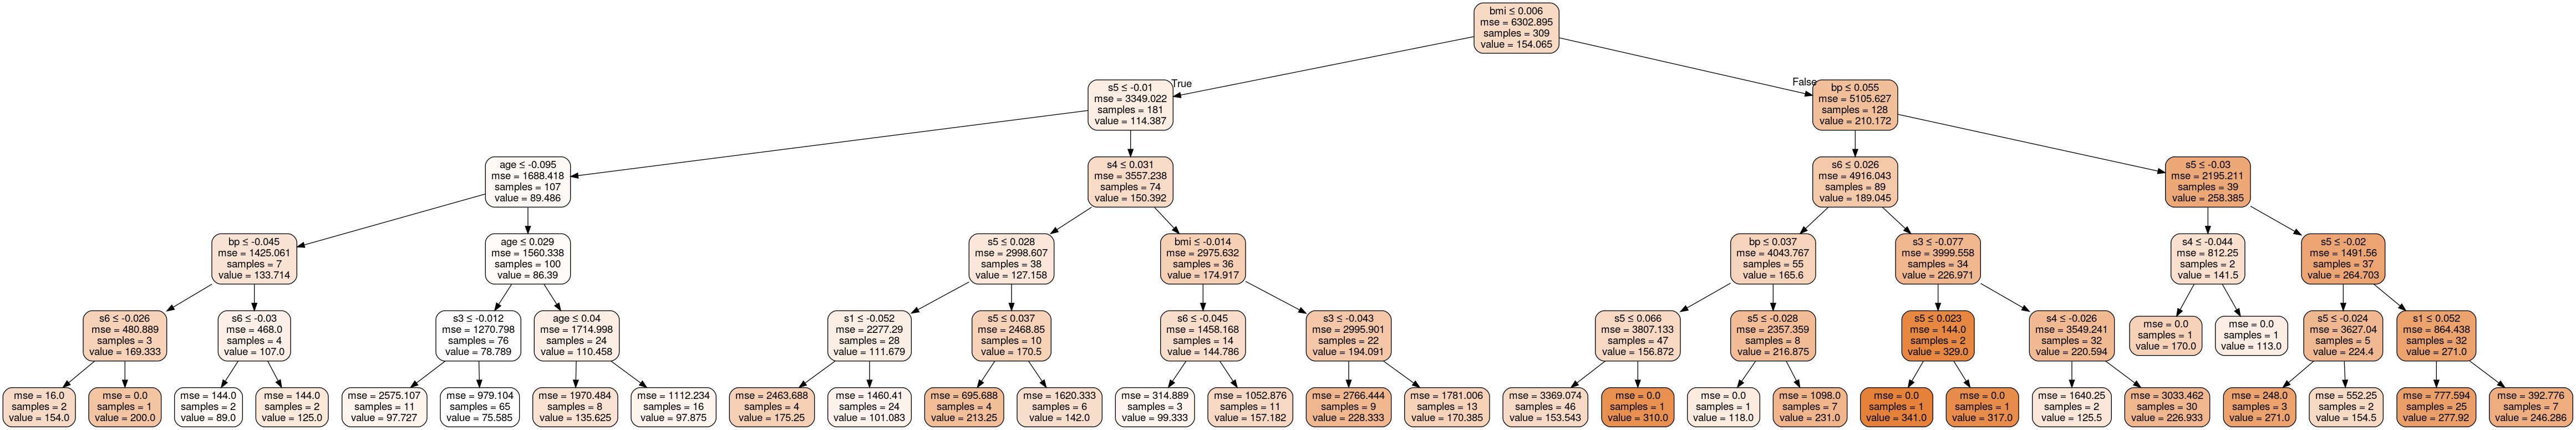

In [49]:
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = diabetes.feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())